# Project V0.0.1
By Jason Ivey, Ziad Arafat, Jacob Yoder, & Kevin Dhanapal

Note it is best to vscode's inbuilt .venv for the the
kernel

In [7]:
# only run if installs needed
!pip install pandas pyvista

  Obtaining dependency information for pyvista from https://files.pythonhosted.org/packages/70/3f/88bae63eee660f28d5f648d3026fb8a9b125c067cdd956c57bebfa67de91/pyvista-0.41.1-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib>=3.0.1 from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/66/d4/054e491f0880bf0119ee79cdc03264e01d5732e06c454da8c69b83a7c8f2/Pillow-10.0.0-cp311-cp311-win_amd64.whl.metadata
  Using cached Pillow-10.0.0-cp311-cp311-win_amd64.whl.metadata (9.6 kB)
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/48.8 MB ? eta -:--:--

In [4]:
# imports
import pandas as pd

In [6]:
# import ./data/meteorite_landings.csv
# header is row 0
data = pd.read_csv('./data/meteorite_landings.csv', header=0)
data.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


c:\Users\jivey\Documents\GitHub\Metorite_Data_Mine\.venv\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


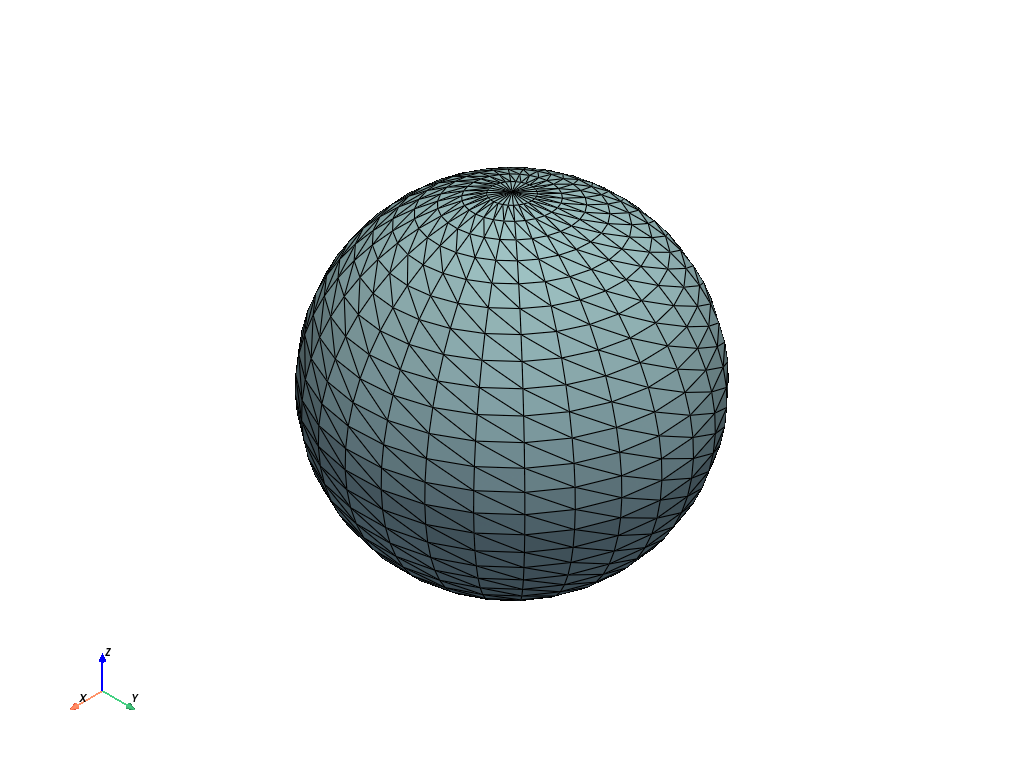

In [8]:
import pyvista

sphere = pyvista.Sphere()
sphere.plot(show_edges=True)